# Clustering Heart Disease Patients

## Understand the scenario and problem

A medical centre from Long Beach wants to understand which treatments might work with their patients who have heart disease. As part of the data analytics professional, I am tasked to provide data-driven suggestions based on my understanding of the data. 

The goals in this project are to analyze the data provided by the medical centre and to cluster anonymized data of patients who have been diagnosed with heart disease. 

If we can cluster the patients with similar characteristics in groups, a particular group of patients might benefit from same treatment, and doctors could benefit from learning about the treatment outcomes of patients like those they are treating.

## Plan

### Long Beach Patients Dataset

In this dataset, there are 303 rows, 12 columns, and these variables:

Variables | Description |
-----|-----|
id| patient identification number|
age| age of patients in years|
sex| sex of patients (male=1, female=0)|
cp| chest pain type (typical angina=1, atypical angina=2, non-anginal pain=3, asymptomatic=4)|
trestbps| resting blood pressure (in mm Hg on admission to the hospital)|
chol| serum cholesterol in mg/dl|
fbs| fasting blood sugar >120mg/dl (True=1, False=0)|
restecg| resting electrocardiographic results (Normal=0, Having ST-T wave=1, Probable or Definite Left Ventricular Hypertrophy=2)|
thalach| maximum heart rate achieved|
exang| exercise-induced angina (Yes=1, No=0)|
oldpeak| ST depression induced by exercise relative to rest|
slope| Slope of the peak exercise ST segment (Upsloping=1, Flat=2, Downsloping=3)|

### Imports
* Import packages
* Load dataset

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for displaying all the columns in dataframes
pd.set_option('display.max_columns',None)
pd.set_option('display.float_format','{:.4f}'.format)

# for modeling and evaluation
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
# load dataset into a dataframe 

data = pd.read_csv('/Users/salai/Library/CloudStorage/OneDrive-Personal/Desktop/Google Advance Data Analytic/Porfolio Projects/Heart Disease/heart_disease_patients.csv')

data.head(5)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3000,3
1,2,67,1,4,160,286,0,2,108,1,1.5000,2
2,3,67,1,4,120,229,0,2,129,1,2.6000,2
3,4,37,1,3,130,250,0,0,187,0,3.5000,3
4,5,41,0,2,130,204,0,2,172,0,1.4000,1


## Analyze


### Exploratory Data Analysis
* Understand variables
* Clean the dataset

In [3]:
# basic information about the data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        303 non-null    int64  
 1   age       303 non-null    int64  
 2   sex       303 non-null    int64  
 3   cp        303 non-null    int64  
 4   trestbps  303 non-null    int64  
 5   chol      303 non-null    int64  
 6   fbs       303 non-null    int64  
 7   restecg   303 non-null    int64  
 8   thalach   303 non-null    int64  
 9   exang     303 non-null    int64  
 10  oldpeak   303 non-null    float64
 11  slope     303 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 28.5 KB


There are 303 patients data with 12 aspects of each patient in this dataset. There are no missing values. The data types are 1 float and 11 integers variables

In [4]:
# gether descriptive statistics about the data

data.describe(include='all')

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
count,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000
mean,152.0000,54.4389,0.6799,3.1584,131.6898,246.6931,0.1485,0.9901,149.6073,0.3267,1.0396,1.6007
std,87.6128,9.0387,0.4673,0.9601,17.5997,51.7769,0.3562,0.9950,22.8750,0.4698,1.1611,0.6162
min,1.0000,29.0000,0.0000,1.0000,94.0000,126.0000,0.0000,0.0000,71.0000,0.0000,0.0000,1.0000
25%,76.5000,48.0000,0.0000,3.0000,120.0000,211.0000,0.0000,0.0000,133.5000,0.0000,0.0000,1.0000
50%,152.0000,56.0000,1.0000,3.0000,130.0000,241.0000,0.0000,1.0000,153.0000,0.0000,0.8000,2.0000
75%,227.5000,61.0000,1.0000,4.0000,140.0000,275.0000,0.0000,2.0000,166.0000,1.0000,1.6000,2.0000
max,303.0000,77.0000,1.0000,4.0000,200.0000,564.0000,1.0000,2.0000,202.0000,1.0000,6.2000,3.0000


There may be outliers in `chol` and `oldpeak` since the maximum values are relatively much higher than 75th percentile values.

In [5]:
# check for missing values

data.isna().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
dtype: int64

In [6]:
# check for duplicates

data.duplicated().sum()

0

There are no missing values and duplicates in this dataset.

In [7]:
# check outliers

def check_outliers(col_name:str, df):
    '''
    This function is used to check whether a variable contains outliers.
    In:
        col_name: name of the column that we are interested in checking for outliers.
        df: data frame where the column can be found
    
    Out: print to give whether the column contains outliers or not
    '''

    # calculate 25th and 75th percentiles of the column of interest
    
    percentile25 = df[col_name].quantile(0.25)
    percentile75 = df[col_name].quantile(0.75)

    # calculate interquantile range
    
    IQR = percentile75 - percentile25

    # calculate the lower and upper limit of the column of interest
    
    lower_limit = percentile25 - 1.5*IQR
    upper_limit = percentile75 + 1.5*IQR

    # create a conditional statement to check for the outliers
    
    if (df[col_name]<lower_limit).any() | (df[col_name]>upper_limit).any():
        print(f'{col_name} has outliers')

In [8]:
# get the list of column names from data

columns = data.columns

# loop through the list using the check_outliers function

for col in columns:
    check_outliers(col, data)

cp has outliers
trestbps has outliers
chol has outliers
fbs has outliers
thalach has outliers
oldpeak has outliers


These following numerial features have outliers that need to be replaced by either lower or upper limits: `trestbps`, `chol`, `thalach` and `oldpeak`.

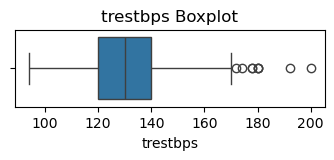

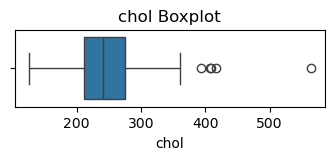

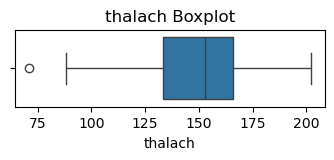

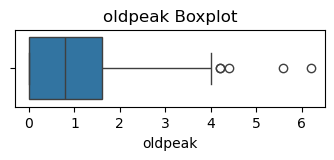

In [9]:
# plot boxplots of the above-mentioned features for visualization

col_outliers = ['trestbps','chol','thalach','oldpeak']

for col in col_outliers:
    plt.figure(figsize=(4,1))
    sns.boxplot(data= data, x=col)
    plt.xlabel(col)
    plt.title(f"{col} Boxplot")
    plt.show()

In [10]:
# define a function to replace the outliers with upper or lower limits

def replace_outliers(col:str, df):
    '''
    This function is used to check whether a variable contains outliers.
    In:
        col: name of the column that we are interested in replacing outliers.
        df: data frame where the column can be found
    
    Out: return all the values that are within lower or upper limits for the column
    '''
    df[col] = df[col].astype(float)
    percentile75 = df[col].quantile(0.75)
    percentile25 = df[col].quantile(0.25)

    IQR = percentile75 - percentile25

    upper_limit = percentile75 + 1.5*IQR
    lower_limit = percentile25 - 1.5*IQR

    if (df[col]>upper_limit).any():
        df.loc[df[col]>upper_limit, col]=upper_limit
    elif (df[col]<lower_limit).any():
        df.loc[df[col]<lower_limit, col]=lower_limit

In [11]:
# copy the original dataframe to a variable

data_ver1 = data.copy()

# loop through the columns with outliers to replace_outliers function

for col in col_outliers:
    replace_outliers(col, data_ver1)

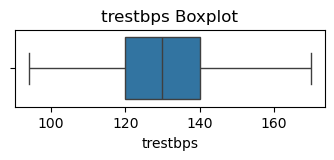

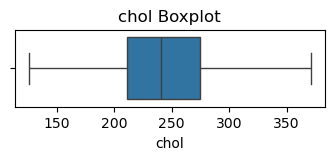

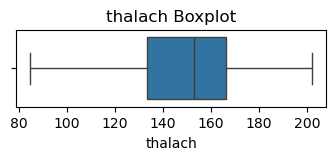

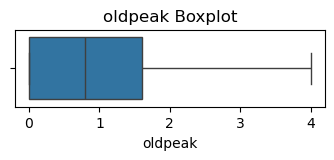

In [12]:
# plot boxplots to check all the outliers have been replaced with either upper or lower limit 

col_outliers = ['trestbps','chol','thalach','oldpeak']

for col in col_outliers:
    plt.figure(figsize=(4,1))
    sns.boxplot(data= data_ver1, x=col)
    plt.xlabel(col)
    plt.title(f"{col} Boxplot")
    plt.show()

### Drop a column

Drop the `id` column since this feature does not give any information about the patients' physiological status.

In [13]:
# drop id column

data_subset = data_ver1.drop('id', axis=1)

data_subset.reset_index(drop=True)

data_subset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,63,1,1,145.0000,233.0000,1,2,150.0000,0,2.3000,3
1,67,1,4,160.0000,286.0000,0,2,108.0000,1,1.5000,2
2,67,1,4,120.0000,229.0000,0,2,129.0000,1,2.6000,2
3,37,1,3,130.0000,250.0000,0,0,187.0000,0,3.5000,3
4,41,0,2,130.0000,204.0000,0,2,172.0000,0,1.4000,1


### Scale the features

In [14]:
# scale the features and assign to variable `X_scaled`

X_scaled = StandardScaler().fit_transform(data_subset)

# look at the 1st five rows of the scaled data
X_scaled[:5]

array([[ 0.94872647,  0.68620244, -2.25177456,  0.82144621, -0.26503981,
         2.394438  ,  1.01668424,  0.01530611, -0.69663055,  1.15093843,
         2.27457861],
       [ 1.39200191,  0.68620244,  0.87798549,  1.72390525,  0.8512136 ,
        -0.41763453,  1.01668424, -1.83538756,  1.43548113,  0.42910796,
         0.64911323],
       [ 1.39200191,  0.68620244,  0.87798549, -0.68265218, -0.34928535,
        -0.41763453,  1.01668424, -0.91004073,  1.43548113,  1.42162486,
         0.64911323],
       [-1.93256387,  0.68620244, -0.16526786, -0.08101282,  0.09300374,
        -0.41763453, -0.99674925,  1.6456791 , -0.69663055,  2.23368413,
         2.27457861],
       [-1.48928843, -1.4572959 , -1.20852121, -0.08101282, -0.87581997,
        -0.41763453,  1.01668424,  0.98471708, -0.69663055,  0.33887916,
        -0.97635214]])

## Data modeling

In [15]:
# fit K-means and evaluate inertia for different values for k

num_clusters = [i for i in range(2,11)]

def kmeans_inertia(num_clusters, x_vals):
    '''
    In:
        num_clusters: number of clusters (k) for the K-Means model
        x_vals: dataset to fit into the model
    Out:
        returns each k-value's inertia append to a list
    '''
    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init='auto')
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    return inertia

In [16]:
# return a list of inertia for k=2 to 10

inertia = kmeans_inertia(num_clusters, X_scaled)

inertia

[2751.5087204821516,
 2529.1587068375816,
 2372.5957462973392,
 2188.65485182335,
 2126.568880855445,
 2074.84723695313,
 1993.7138292077086,
 1931.5365852383025,
 1887.5486042943685]

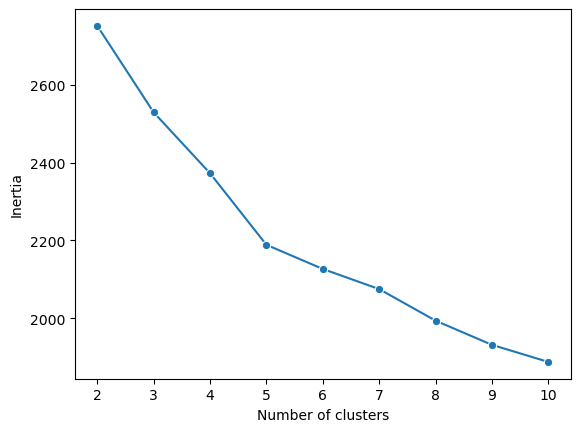

In [17]:
# create a line plot to visualize the relationship between num_clusters and inertia

plot = sns.lineplot(x=num_clusters, y=inertia, marker='o')
plot.set_xlabel('Number of clusters')
plot.set_ylabel('Inertia')
plt.show()

The plot seems to depict an elbow at five clusters, but there isn't a clear method for confirming that a five-cluster model is optimal. Therefore, the silhouette scores should be checked.

## Results and evaluation

In [18]:
# evaluate silhouette score

def kmeans_sil(num_clusters, x_vals):
    '''
    In:
        num_clusters: number of clusters (k) for the K-Means model
        x_vals: dataset to fit into the model
    Out:
        Returns each k-value's silhouette score append to a list
    '''
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42, n_init='auto')
        kms.fit(x_vals)
        sil_score.append(silhouette_score(x_vals, kms.labels_))
    return sil_score


sil_score = kmeans_sil(num_clusters, X_scaled)
sil_score    

[0.17014450462100383,
 0.1306489344938828,
 0.12604869072081054,
 0.12808214211315738,
 0.11301637847030985,
 0.10335586280479002,
 0.10952444025439897,
 0.10619517076961675,
 0.10484913464442333]

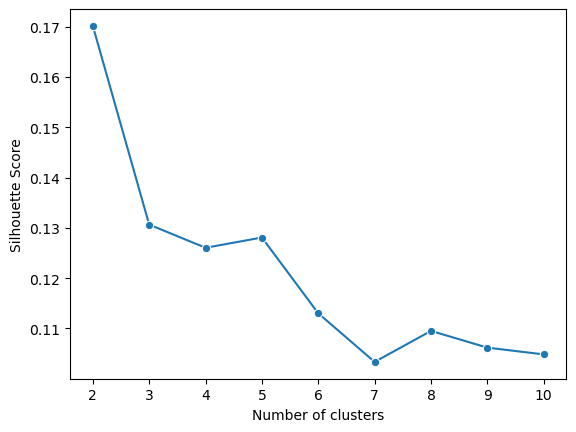

In [19]:
# create a line plot to visualize the relationship between num_clusters and sil_score

plot = sns.lineplot(x=num_clusters, y=sil_score, marker='o')
plot.set_xlabel('Number of clusters')
plot.set_ylabel('Silhouette Score')
plt.show()

This silhouette score plot indicates that the optimal clusters for the K-Mean model would be 5 clusters, as this number of clusters ensures minimum variations within each cluster while ensuring optimal separation between the clusters.

### Optimal k-value

In [20]:
# fit a 5-cluster model

kmean5 = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmean5.fit(X_scaled)

KMeans(n_clusters=5, n_init='auto', random_state=42)

In [21]:
# print out unique labels

print('Unique labels:', np.unique(kmean5.labels_))

Unique labels: [0 1 2 3 4]


We will create a new column `cluster` that indicates cluster assigment in the Data Frame `data`.

In [22]:
# create a new column `cluster`

data['cluster'] = kmean5.labels_
data.head(5)

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cluster
0,1,63,1,1,145,233,1,2,150,0,2.3000,3,4
1,2,67,1,4,160,286,0,2,108,1,1.5000,2,3
2,3,67,1,4,120,229,0,2,129,1,2.6000,2,3
3,4,37,1,3,130,250,0,0,187,0,3.5000,3,1
4,5,41,0,2,130,204,0,2,172,0,1.4000,1,1


In [23]:
# find out the number of patients in each cluster

print(data['cluster'].value_counts())

print(data['cluster'].value_counts(normalize=True))

cluster
1    92
3    69
0    58
4    43
2    41
Name: count, dtype: int64
cluster
1   0.3036
3   0.2277
0   0.1914
4   0.1419
2   0.1353
Name: proportion, dtype: float64


There seem to have no class imbalance among all the cluster since there is no one cluster that represent a large proportion of the patients.

### Decision Tree modeling

We will use a Decision Tree to determine which features play an important role in classifying the patients into 5 clusters. Furthermore, since our dataset contains outliers, decision tree classification is appropriate because the algorithm can handle outliers in the data.

In [24]:
# for data modeling

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import plot_tree

In [25]:
# drop `id` column from the data set

data_ver2 = data.drop(['id'],axis=1)

data_ver2.reset_index(drop=True)

data_ver2.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,cluster
0,63,1,1,145,233,1,2,150,0,2.3000,3,4
1,67,1,4,160,286,0,2,108,1,1.5000,2,3
2,67,1,4,120,229,0,2,129,1,2.6000,2,3
3,37,1,3,130,250,0,0,187,0,3.5000,3,1
4,41,0,2,130,204,0,2,172,0,1.4000,1,1


In [26]:
# select features for the models
X = data_ver2.drop(['cluster'],axis=1)
print(X.shape)

# isolate the target variable
y = data_ver2['cluster']
print(y.shape)

(303, 11)
(303,)


In [27]:
# instantiate model

dt = DecisionTreeClassifier(random_state=0)

# assign a dictionary of hyperparameters to search over

dt_params = {'max_depth':[5, 10, 20, None],
            'max_features':[0.8, 1.0],
            'min_samples_leaf':[1, 2],
            'min_samples_split':[2,3],
            }

# instantiate gridsearch

dt_cv = GridSearchCV(dt,
                    dt_params,
                    cv=5)

In [28]:
%%time

#fit the dataset into gridsearch

dt_cv.fit(X,y)

CPU times: user 562 ms, sys: 739 ms, total: 1.3 s
Wall time: 280 ms


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [5, 10, 20, None],
                         'max_features': [0.8, 1.0], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]})

In [29]:
# check for best parameters

dt_cv.best_params_

{'max_depth': 10,
 'max_features': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

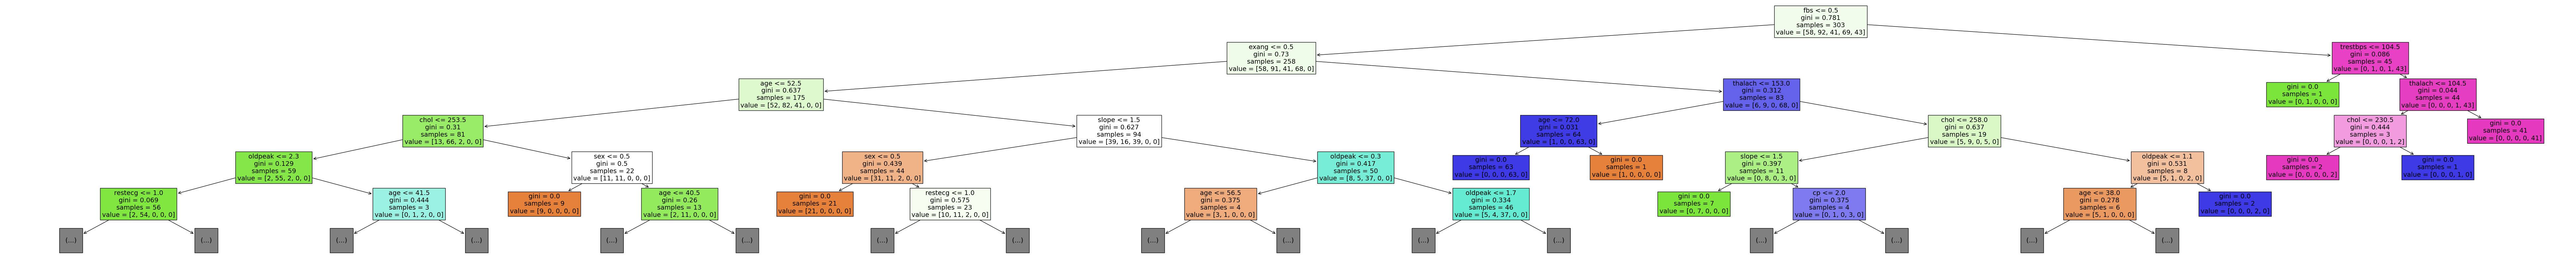

In [30]:
# plot the tree

plt.figure(figsize=(100,10))

plot_tree(dt_cv.best_estimator_, max_depth=5, fontsize=14, feature_names=X.columns, filled=True)
plt.show()

Based on the decision tree diagram above, the following are the characteristics of each cluster:

Cluster No.| Characteristics|
-----|-----|
0| Most patients have an upsloping or flat slope of peak exercise ST segment and are females.|
1| Most of the patients have a serum cholesterol level of at most 253.5mg/dl and have ST depression induced by exercise relative to rest less than 2.3|
2| Most of the patients have either a flat or downsloping slope of peak exercise ST segment and have ST depression induced by exercise relative to rest of more than 0.3|
3| Most of the patients have exercise-induced angina|
4| Most of the patients have fasting blood sugar level more than 120mg/dl|

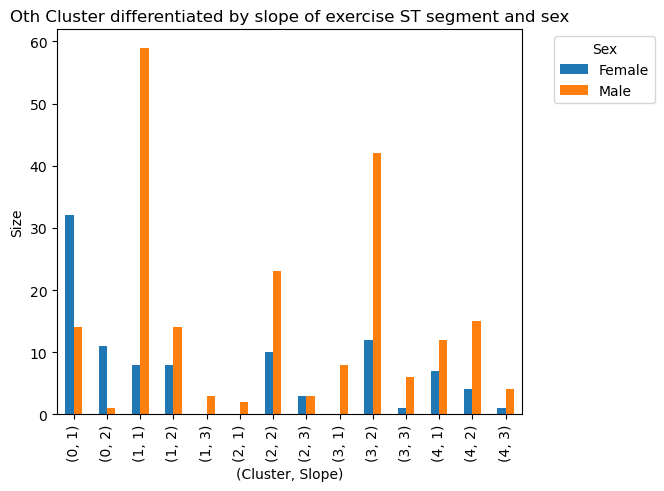

In [31]:
# visualize 0th cluster that is differentiated by `slope` and `sex` 
data.groupby(by=['cluster','slope','sex']).size().unstack(level='sex', fill_value=0)\
.plot.bar(title='Oth Cluster differentiated by slope of exercise ST segment and sex',
          figsize=(6,5), ylabel='Size', xlabel='(Cluster, Slope)')

plt.legend(title='Sex',labels=['Female','Male'],bbox_to_anchor=(1.3,1.0))
plt.show()

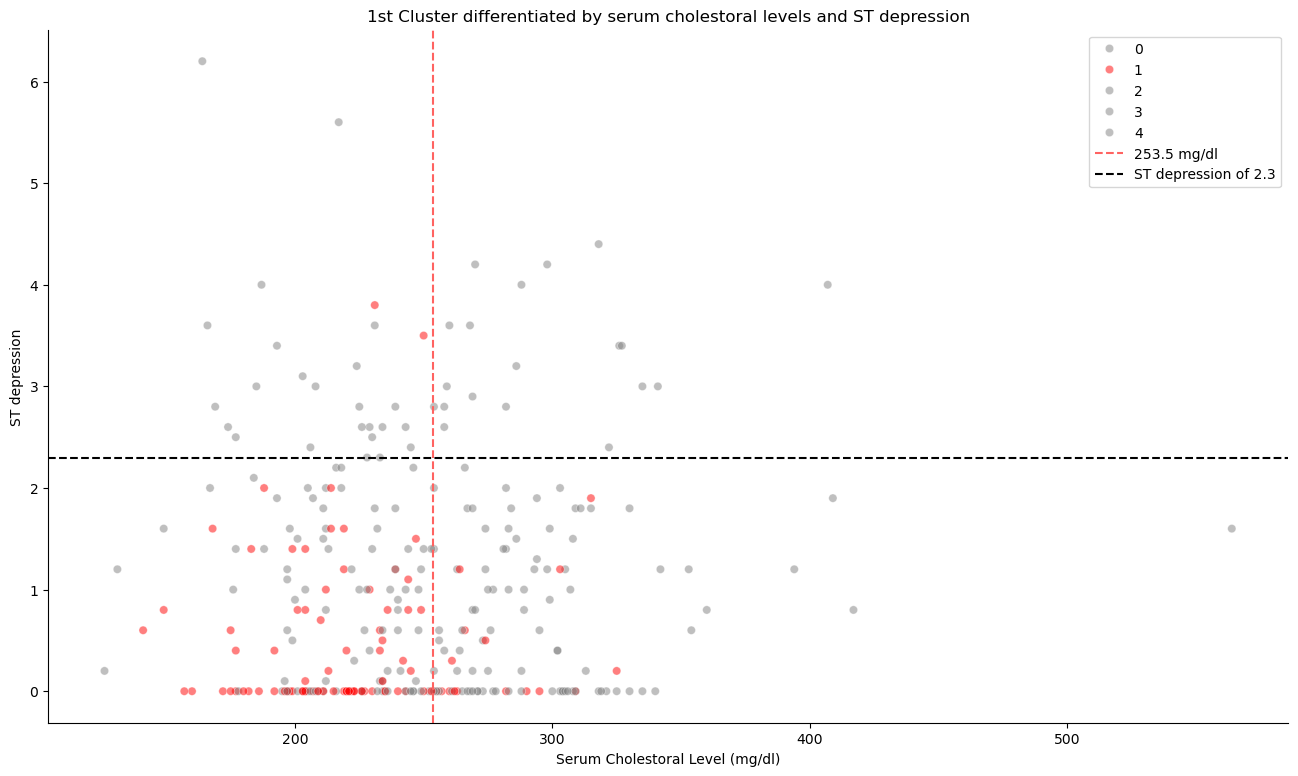

In [32]:
# visualize 1st Cluster that is differentiated by 'chol' and 'oldpeak'

palette = {0: 'grey', 1: 'red', 2: 'grey', 3: 'grey', 4: 'grey'}

plt.figure(figsize=(16,9))

sns.scatterplot(data=data, x='chol', y='oldpeak', hue='cluster',palette=palette, alpha=0.5)
sns.despine()
plt.axvline(x=253.5, color='#ff6361', label='253.5 mg/dl', ls='--')
plt.axhline(y=2.3, color='black', label='ST depression of 2.3', ls='--')
plt.legend(loc='upper right')
plt.xlabel('Serum Cholestoral Level (mg/dl)')
plt.ylabel('ST depression')
plt.title('1st Cluster differentiated by serum cholestoral levels and ST depression')
plt.show()

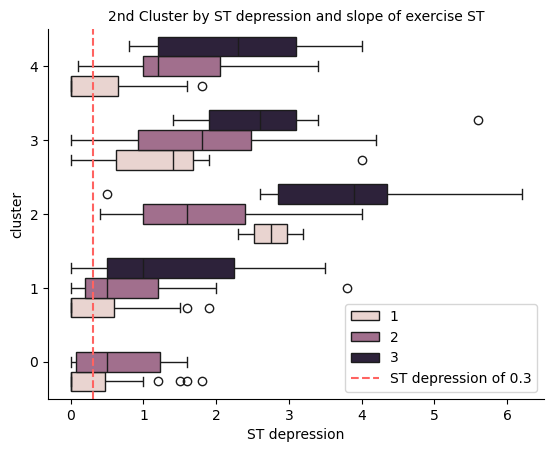

In [33]:
# visualise 2nd cluster differentiated by 'oldpeak' and 'slope' 

sns.boxplot(data=data, x='oldpeak', y='cluster', hue='slope', orient='h')
sns.despine()
plt.axvline(x=0.3,  color='#ff6361', label='ST depression of 0.3', ls='--')
plt.xlabel('ST depression')
plt.gca().invert_yaxis()
plt.title('2nd Cluster by ST depression and slope of exercise ST', fontsize=10)
plt.legend()

plt.show()

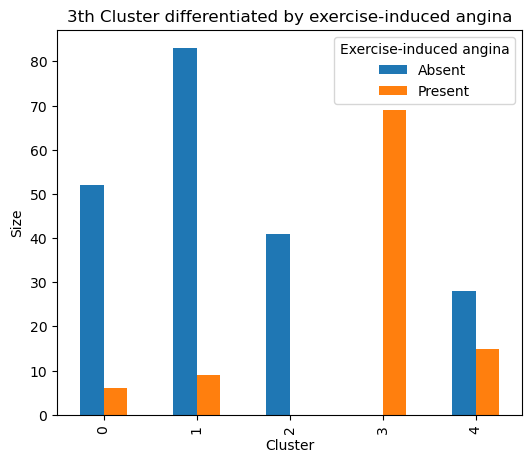

In [34]:
# visualise 3rd cluster differentiated by 'exang'

data.groupby(by=['cluster','exang']).size().unstack(level='exang', fill_value=0)\
.plot.bar(title='3th Cluster differentiated by exercise-induced angina',
          figsize=(6,5), ylabel='Size', xlabel='Cluster')

plt.legend(title='Exercise-induced angina',labels=['Absent','Present'], loc='upper right')
plt.show()

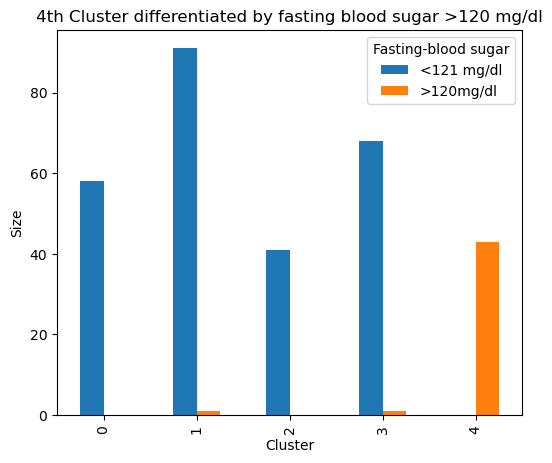

In [35]:
# visualise 4rd cluster differentiated by 'fbs'

data.groupby(by=['cluster','fbs']).size().unstack(level='fbs', fill_value=0)\
.plot.bar(title='4th Cluster differentiated by fasting blood sugar >120 mg/dl',
          figsize=(6,5), ylabel='Size', xlabel='Cluster')

plt.legend(title='Fasting-blood sugar',labels=['<121 mg/dl','>120mg/dl'], loc='upper right')
plt.show()

## Conclusion

In this project, we successfully analyzed the data provided by the medical center in Long Beach to identify meaningful clusters among patients diagnosed with heart disease. We employed the K-Means clustering algorithm to determine that five clusters best represent the data, as indicated by the silhouette score analysis. Furthermore, we used a Decision Tree to identify distinct characteristics of each cluster, providing valuable insights for personalized treatment plans. 

The characteristics of each cluster are as follows:
> * Cluster 0: Predominantly female patients with an upsloping or flat slope of peak exercise ST segment.
> * Cluster 1: Patients with at most 253.5 mg/dl serum cholesterol levels and ST depression induced by exercise relative to rest of less than 2.3.
> * Cluster 2: Patients with a flat or downsloping slope of peak exercise ST segment and ST depression induced by exercise relative to rest of more than 0.3.
> * Cluster 3: Patients who experience exercise-induced angina.
> * Cluster 4: Patients with fasting blood sugar levels greater than 120 mg/dl.

These insights can help medical professionals tailor treatments more effectively based on the specific characteristics of each patient group, ultimately improving patient outcomes and optimizing healthcare resources. The methodology and findings can be a foundation for future studies and more advanced predictive modeling efforts in the healthcare domain.